# Classification Assignment

Data Source https://www.kaggle.com/blastchar/telco-customer-churn

Download data from here: https://drive.google.com/file/d/1Fpt4iCGcLWCOay_elL55-oXEF1q0Mkpo/view?usp=sharing

## 1. Basic Pandas Operations

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the dataset and display the head. You will get the output as mentioned below

df = pd.read_csv(r'C:\Users\V.MANOHAR\churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the shape of the dataframe

df.shape

(7043, 21)

In [5]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Cleaning the Data

In [6]:
# Observe that all these Object columns have two values - Yes and No

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [7]:
# Converting all the Yes to 1 and No to 0

var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [8]:
# Now again having a look at all those columns to see if everything went well

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [9]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [11]:
# You can also do this to separate Object columns

df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [12]:
# TotalCharges should be a float but it is a Object type. Lets try converting it to float64

#df['TotalCharges'] = df['TotalCharges'].astype('float64')

#df.info()

In [13]:
# Lets just try to see what is happening with TotalCharges. Check the output.

df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
2799        1
2698.35     1
631.85      1
4732.35     1
6873.75     1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
# Looking at all 11 Null Values

# df.loc[df.TotalCharges == '', :]

In [15]:
# Converting empty string in TotalCharges to NaN

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [16]:
# Observe the output, TotalCharges has 11 Missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [17]:
# Dropping customerID

df = df.drop('customerID', axis=1)

df.shape

(7043, 20)

In [18]:
# Getting all the Object Dtypes

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [19]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.shape

(7043, 20)

In [21]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [23]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [24]:
df = df.drop(df_categorical.columns, axis=1)

In [25]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

### Outliers

In [27]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


### Missing Values

In [30]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [31]:
df = df[~np.isnan(df['TotalCharges'])]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [33]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [34]:
df['Churn'].value_counts()

# Churn 'Yes' are 1

0    5163
1    1869
Name: Churn, dtype: int64

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Undersampling

In [35]:
data = df.sample(frac=1)

# amount of fraud classes 492 rows.
Yes = df.loc[df['Churn'] == 1]
No = df.loc[df['Churn'] == 0][:1869]

normal_distributed_df = pd.concat([Yes, No])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4402,0,0,0,39,0,1,1,0,1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2029,0,1,0,67,1,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1338,0,0,0,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4230,0,0,0,11,1,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6290,0,1,0,71,1,0,0,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
new_df.shape

(3738, 25)

In [37]:
df1 = new_df.reset_index()

In [38]:
df1.head()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,4402,0,0,0,39,0,1,1,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2029,0,1,0,67,1,1,1,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1338,0,0,0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4230,0,0,0,11,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6290,0,1,0,71,1,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
del df1['index']

In [40]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,39,0,1,1,0,1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,67,1,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0,0,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,11,1,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,71,1,0,0,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Standardised Data

In [41]:
target = df1['Churn']
data = df1.drop("Churn",axis=1)

In [42]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,39,0,1,1,0,1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,67,1,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0,0,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,11,1,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,71,1,0,0,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [44]:
print(data.shape)
print(target.shape)

(3738, 24)
(3738,)


In [45]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df1)
print(standardized_data.shape)

(3738, 25)


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                   target, 
                                                   test_size = 0.20, 
                                                   random_state = 0)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2990, 24)
(748, 24)
(2990,)
(748,)


## Model Building - Logistic Regression

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Accuracy, Precision, Recall 

In [50]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5]}]

evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
   
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'C': 2}
LogisticRegression(C=2)
0.7526737967914439

for precision
Best parameters set found on train set:
{'C': 2}
LogisticRegression(C=2)
0.7615384615384615

for recall
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
0.7634961439588689



In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7553475935828877

### Confusion Matrix

In [53]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[268,  91],
       [ 92, 297]], dtype=int64)

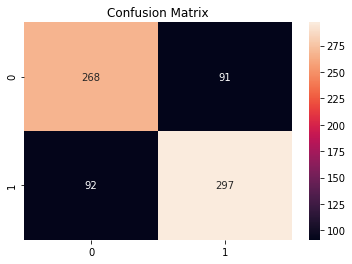

In [54]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [55]:
from sklearn import metrics

### Classification Report

In [56]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       359
           1       0.77      0.76      0.76       389

    accuracy                           0.76       748
   macro avg       0.75      0.76      0.75       748
weighted avg       0.76      0.76      0.76       748



In [57]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7553475935828877
0.7654639175257731
0.7550071249042256
0.7644787644787645
0.7634961439588689


### F1 Score

In [58]:
metrics.f1_score(y_test,y_pred)

0.7644787644787645

### Roc Auc

In [59]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.8328547593644156


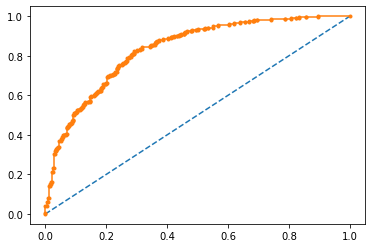

In [60]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Model Building - KNN

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy, Precision, Recall

In [63]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]
evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
   
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()
0.6978609625668449

for precision
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4, p=3)
0.7737226277372263

for recall
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)
0.6838046272493573



### Predict

In [64]:
y_pred = classifier.predict(X_test)

### Evaluate

In [65]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6978609625668449

### Confusion Matrix

In [66]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[265,  94],
       [132, 257]], dtype=int64)

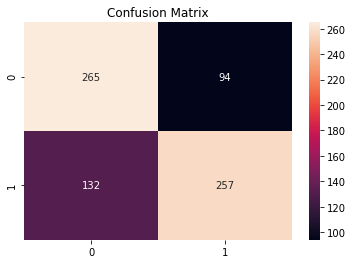

In [67]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [68]:
from sklearn import metrics

### Classification Report

In [69]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       359
           1       0.73      0.66      0.69       389

    accuracy                           0.70       748
   macro avg       0.70      0.70      0.70       748
weighted avg       0.70      0.70      0.70       748



In [70]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.6978609625668449
0.7321937321937322
0.6994149701756521
0.6945945945945946
0.6606683804627249


### F1 Score

In [71]:
metrics.f1_score(y_test,y_pred)

0.6945945945945946

### Roc Auc

In [72]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.7490708981675749


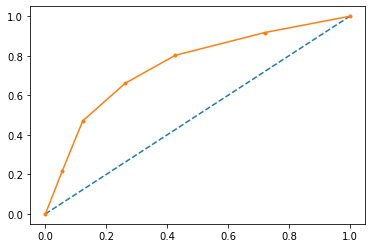

In [73]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Model Building - Decision Tree

In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [75]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Accuracy, Precision, Recall

In [76]:
tuned_parameters = [{'max_depth':[1,2,3,4,5]}]
evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)
0.7553475935828877

for precision
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)
0.782967032967033

for recall
Best parameters set found on train set:
{'max_depth': 1}
DecisionTreeClassifier(max_depth=1)
0.9717223650385605



### Predict

In [77]:
y_pred = classifier.predict(X_test)

### Evaluate

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7459893048128342

### Confusion Matrix

In [79]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[222, 137],
       [ 53, 336]], dtype=int64)

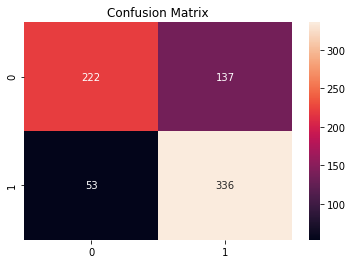

In [80]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [81]:
from sklearn import metrics

### Classification Report

In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       359
           1       0.71      0.86      0.78       389

    accuracy                           0.75       748
   macro avg       0.76      0.74      0.74       748
weighted avg       0.76      0.75      0.74       748



In [83]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7459893048128342
0.7103594080338267
0.7410688072409077
0.7795823665893271
0.8637532133676092


### F1 Score

In [84]:
metrics.f1_score(y_test,y_pred)

0.7795823665893271

### Roc Auc

In [85]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.7562423469935768


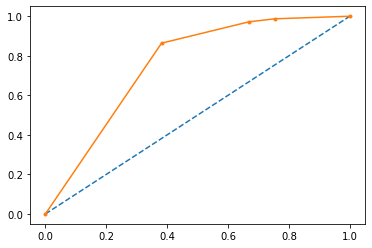

In [86]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Model Building - Random Forest

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

## Accuracy, Precision, Recall

In [89]:
tuned_parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10],'n_estimators':[100,200]}]
evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'n_estimators': 100, 'max_depth': 9}
RandomForestClassifier(max_depth=9)
0.7553475935828877

for precision
Best parameters set found on train set:
{'n_estimators': 200, 'max_depth': 7}
RandomForestClassifier(max_depth=7, n_estimators=200)
0.7666666666666667

for recall
Best parameters set found on train set:
{'n_estimators': 200, 'max_depth': 1}
RandomForestClassifier(max_depth=1, n_estimators=200)
0.7557840616966581



### Predict

In [90]:
y_pred = classifier.predict(X_test)

### Evaluate

In [91]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7606951871657754

### Confusion Matrix

In [92]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[270,  89],
       [ 90, 299]], dtype=int64)

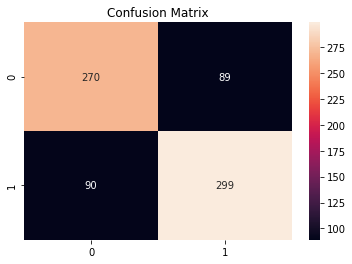

In [93]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [94]:
from sklearn import metrics

### Classification Report

In [95]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       359
           1       0.77      0.77      0.77       389

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [96]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7606951871657754
0.770618556701031
0.7603633343119633
0.7696267696267697
0.7686375321336761


### F1 Score

In [97]:
metrics.f1_score(y_test,y_pred)

0.7696267696267697

### Roc Auc

In [98]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.8355579265454598


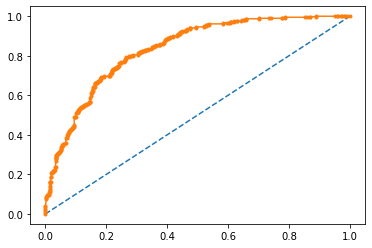

In [99]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Model Building - SVM

In [100]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [101]:
from sklearn.svm import SVC

### Accuracy, Precision, Recall

In [102]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100,1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100,1000]}]

evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')
0.7366310160427807

for precision
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.6130496583732697, 'C': 1}
SVC(C=1, gamma=0.6130496583732697)
0.8795180722891566

for recall
Best parameters set found on train set:
{'kernel': 'linear', 'C': 1}
SVC(C=1, kernel='linear')
0.6683804627249358



### Predict

In [104]:
y_pred = classifier.predict(X_test)

### Evaluate

In [105]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7606951871657754

### Confusion Matrix

In [106]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[270,  89],
       [ 90, 299]], dtype=int64)

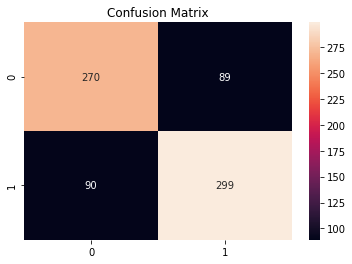

In [107]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [108]:
from sklearn import metrics

### Classification Report

In [109]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       359
           1       0.77      0.77      0.77       389

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [110]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7606951871657754
0.770618556701031
0.7603633343119633
0.7696267696267697
0.7686375321336761


### F1 Score

In [111]:
metrics.f1_score(y_test,y_pred)

0.7696267696267697

### Roc Auc

In [112]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.8355579265454598


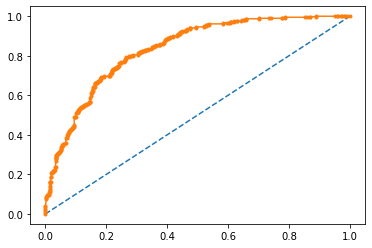

In [113]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()